In [1]:
# import libraries
import pandas as pd

In [2]:
# create dataframe
df = pd.read_csv("dataset.csv")
df = df.drop(["AVERAGE"], axis=1)
df = df[df["Region"] == "Moscow"]
df = df.drop(["Region"], axis=1)
df = df[df["Metro station"] != "Подольск"]
df = df[df["Metro station"] != "Нахабино"]
df = df[df["Metro station"] != "Битца"]
df

,Price,Apartment type,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
314,108800000.0,Secondary,Чеховская,5.0,3.0,108.8,57.1,15.6,3.0,3,Without renovation
315,53000000.0,Secondary,Арбатская,9.0,3.0,96.9,59.0,11.1,2.0,5,Without renovation
316,44240000.0,Secondary,Фили,6.0,3.0,63.2,34.1,11.9,40.0,41,Designer
317,105000000.0,Secondary,Белорусская,6.0,3.0,145.0,75.4,18.6,3.0,6,Designer
318,47000000.0,Secondary,Белорусская,9.0,3.0,103.8,59.0,15.0,6.0,6,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...
22642,14541800.0,New building,Аннино,7.0,2.0,79.9,42.5,13.3,6.0,22,Cosmetic
22643,14676600.0,New building,Аннино,7.0,2.0,80.2,42.7,13.3,8.0,22,Cosmetic
22644,13739550.0,New building,Аннино,7.0,2.0,75.7,40.4,12.9,5.0,22,Cosmetic
22645,8000000.0,New building,Царицыно,7.0,1.0,40.2,18.3,9.2,15.0,13,Cosmetic


In [3]:
theatric_df = pd.read_csv("theatric.csv")
time_to_teatralnaya = dict()
for row in theatric_df.itertuples():
    rowdata = row[1]
    row_time = int(rowdata.split(" ")[-1])
    row_name = " ".join(rowdata.split(" ")[:-1])
    time_to_teatralnaya[row_name] = row_time

df["Time to Teatralnaya"] = df["Metro station"].map(time_to_teatralnaya)
df["Time to Teatralnaya"].isnull().sum()


0

In [4]:
district_df = pd.read_csv("station_distr.csv")
station_districts = dict()
for row in district_df.itertuples():
    transname = row[1].lower()
    transname = transname.replace(" ", "")
    transname = transname.replace("ё", "е")
    station_districts[transname] = row[2]

station_districts["библиотекаиленина"] = "Центральный"
station_districts["библиотекаим.ленина"] = "Центральный"
station_districts["карамышевская"] = station_districts["народноеополчение"]
station_districts["зеленоград—крюково"] = "Зеленоградский"
station_districts["силикатная"] = "Новомосковский"
station_districts["новодачная"] = "Северо-Восточный"
station_districts["вешняки"] = station_districts["выхино"]
station_districts["немчиновка"] = "Западный"
station_districts["павшино"] = "Северо-Западный"
station_districts["хлебниково"] = "Северный"
station_districts["долгопрудная"] = "Северный"
station_districts["мякинино"] = "Западный"
station_districts["сколково"] = "Западный"


for station in df["Metro station"].unique():
    transname = station.lower()
    transname = transname.replace(" ", "")
    transname = transname.replace("ё", "е")
    transname = transname.split("(")[0]
    station_districts[station] = station_districts[transname]

df["District"] = df["Metro station"].map(station_districts).fillna("Область")
df = df[df["District"] != "Зеленоградский"]
df

,Price,Apartment type,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,Time to Teatralnaya,District
314,108800000.0,Secondary,Чеховская,5.0,3.0,108.8,57.1,15.6,3.0,3,Without renovation,7,Центральный
315,53000000.0,Secondary,Арбатская,9.0,3.0,96.9,59.0,11.1,2.0,5,Without renovation,11,Центральный
316,44240000.0,Secondary,Фили,6.0,3.0,63.2,34.1,11.9,40.0,41,Designer,29,Западный
317,105000000.0,Secondary,Белорусская,6.0,3.0,145.0,75.4,18.6,3.0,6,Designer,10,Центральный
318,47000000.0,Secondary,Белорусская,9.0,3.0,103.8,59.0,15.0,6.0,6,Without renovation,10,Центральный
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22642,14541800.0,New building,Аннино,7.0,2.0,79.9,42.5,13.3,6.0,22,Cosmetic,42,Южный
22643,14676600.0,New building,Аннино,7.0,2.0,80.2,42.7,13.3,8.0,22,Cosmetic,42,Южный
22644,13739550.0,New building,Аннино,7.0,2.0,75.7,40.4,12.9,5.0,22,Cosmetic,42,Южный
22645,8000000.0,New building,Царицыно,7.0,1.0,40.2,18.3,9.2,15.0,13,Cosmetic,29,Южный


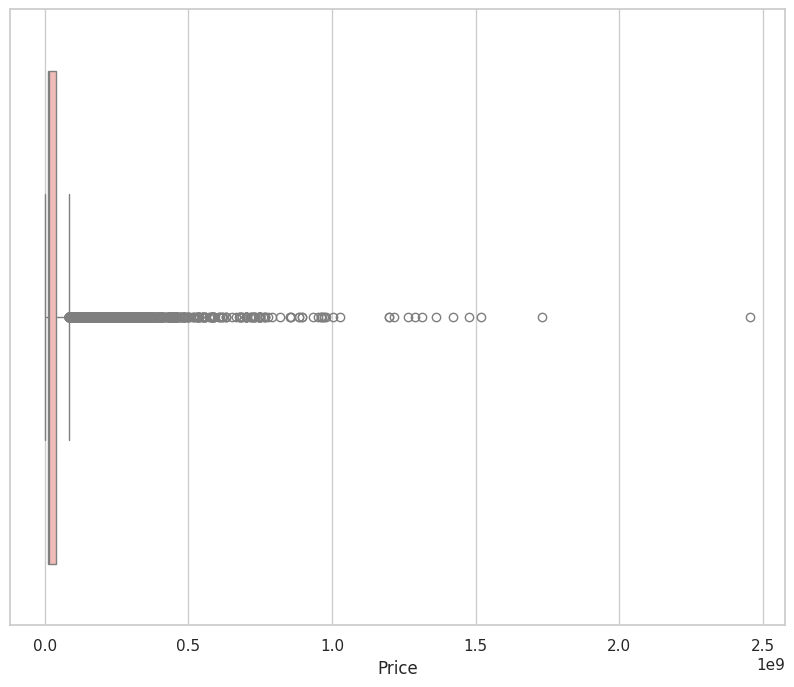

In [5]:
import seaborn as sns

sns.set_theme(rc={"figure.figsize": (10, 8)}, palette="Pastel1", style="whitegrid")

sns.boxplot(data=df, x="Price")
df = df[df["Price"] < 1e9]

In [6]:
df

,Price,Apartment type,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,Time to Teatralnaya,District
314,108800000.0,Secondary,Чеховская,5.0,3.0,108.8,57.1,15.6,3.0,3,Without renovation,7,Центральный
315,53000000.0,Secondary,Арбатская,9.0,3.0,96.9,59.0,11.1,2.0,5,Without renovation,11,Центральный
316,44240000.0,Secondary,Фили,6.0,3.0,63.2,34.1,11.9,40.0,41,Designer,29,Западный
317,105000000.0,Secondary,Белорусская,6.0,3.0,145.0,75.4,18.6,3.0,6,Designer,10,Центральный
318,47000000.0,Secondary,Белорусская,9.0,3.0,103.8,59.0,15.0,6.0,6,Without renovation,10,Центральный
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22642,14541800.0,New building,Аннино,7.0,2.0,79.9,42.5,13.3,6.0,22,Cosmetic,42,Южный
22643,14676600.0,New building,Аннино,7.0,2.0,80.2,42.7,13.3,8.0,22,Cosmetic,42,Южный
22644,13739550.0,New building,Аннино,7.0,2.0,75.7,40.4,12.9,5.0,22,Cosmetic,42,Южный
22645,8000000.0,New building,Царицыно,7.0,1.0,40.2,18.3,9.2,15.0,13,Cosmetic,29,Южный


In [7]:
df[df["Metro station"] == "Спортивная"].median()

/tmp/ipykernel_450832/400408142.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df["Metro station"] == "Спортивная"].median()


Price                  2.249000e+08
Minutes to metro       8.000000e+00
Number of rooms        4.000000e+00
Area                   1.870000e+02
Living area            9.085000e+01
Kitchen area           2.035000e+01
Floor                  6.000000e+00
Number of floors       1.200000e+01
Time to Teatralnaya    1.600000e+01
dtype: float64

<Axes: xlabel='Number of rooms', ylabel='Count'>

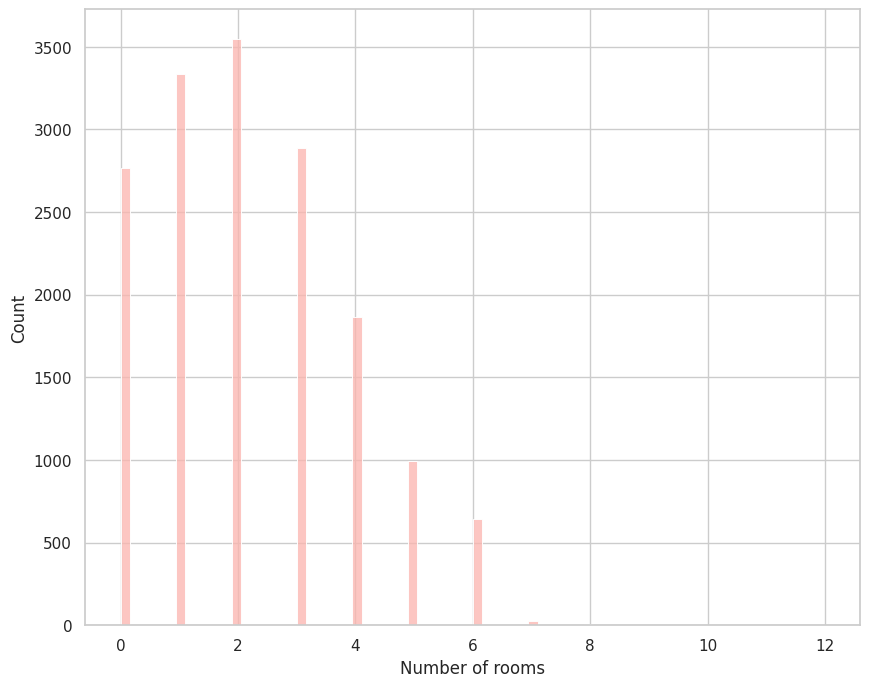

In [8]:
sns.histplot(data=df, x="Number of rooms")

Центральный ЦАО
Западный ЗАО
Северо-Восточный СВАО
Северный САО
Новомосковский НАО
Северо-Западный СЗАО
Южный ЮАО
Восточный ВАО
Юго-Восточный ЮВАО
Юго-Западный ЮЗАО


<Axes: xlabel='District', ylabel='Price'>

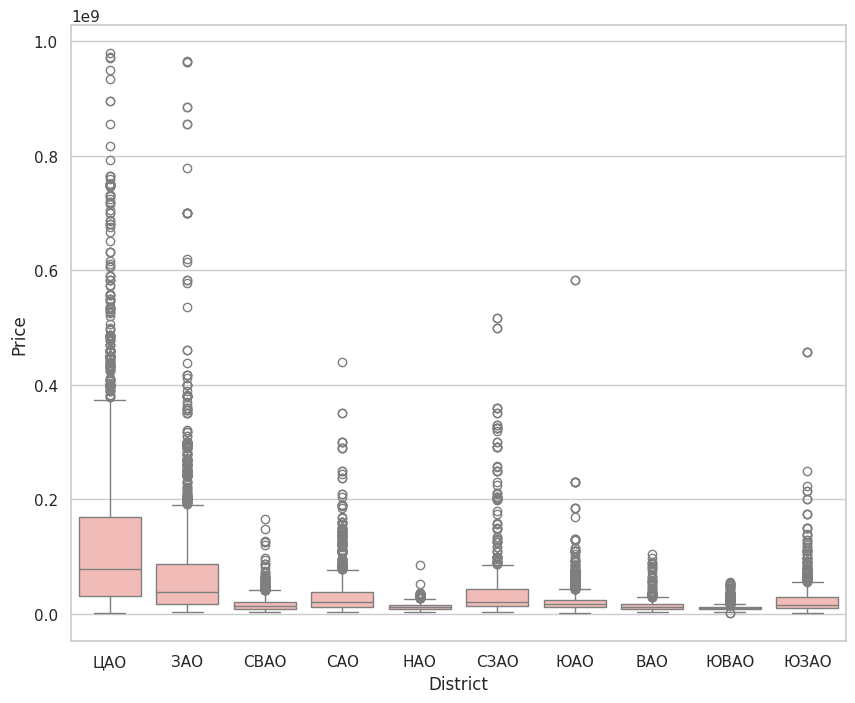

In [9]:
codemap = dict()
for district in df["District"].unique():
    code = ""
    for word in district.split("-"):
        code += word[0]
    code += "АО"
    codemap[district] = code
    print(district, code)
sns.boxplot(data=df, x=df["District"].map(codemap), y="Price")

<Axes: xlabel='Price', ylabel='Count'>

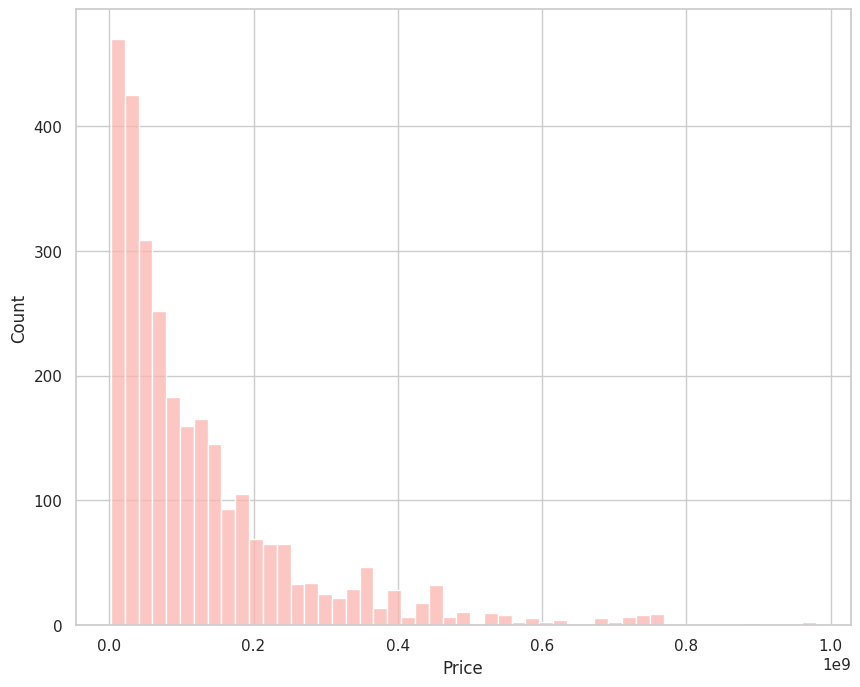

In [10]:
sns.histplot(data=df[df["District"] == "Центральный"], x="Price")

In [11]:
def remove_outliers(df, column, quant=0.03):
    return df[
        (df[column] > df[column].quantile(quant))
        & (df[column] < df[column].quantile(1 - quant))
    ]

<Axes: xlabel='Price', ylabel='Count'>

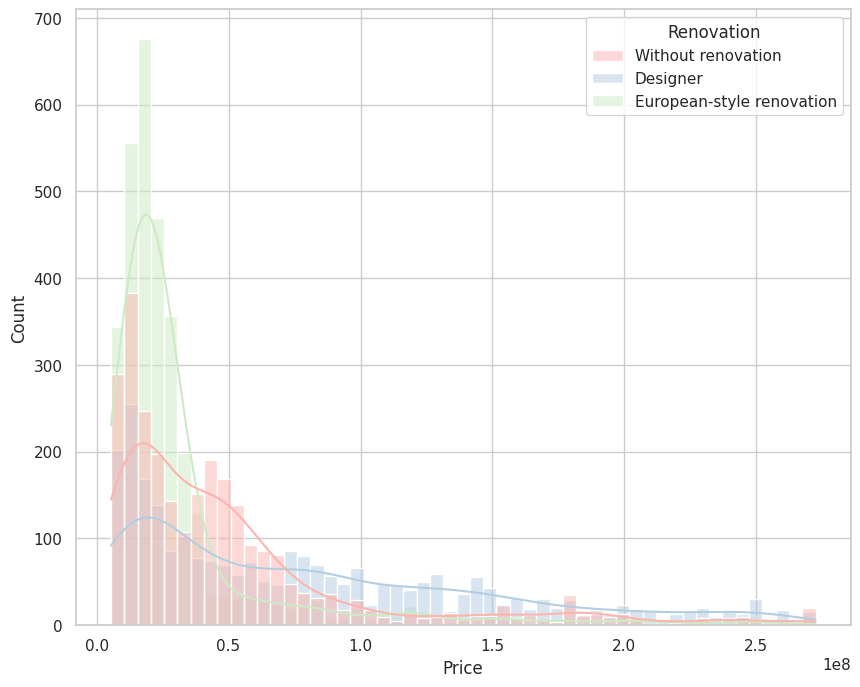

In [12]:
sns.histplot(
    data=remove_outliers(df[df["Renovation"] != "Cosmetic"], "Price", quant=0.05),
    x="Price",
    hue="Renovation",
    kde=True,
)

<Axes: xlabel='Price', ylabel='Count'>

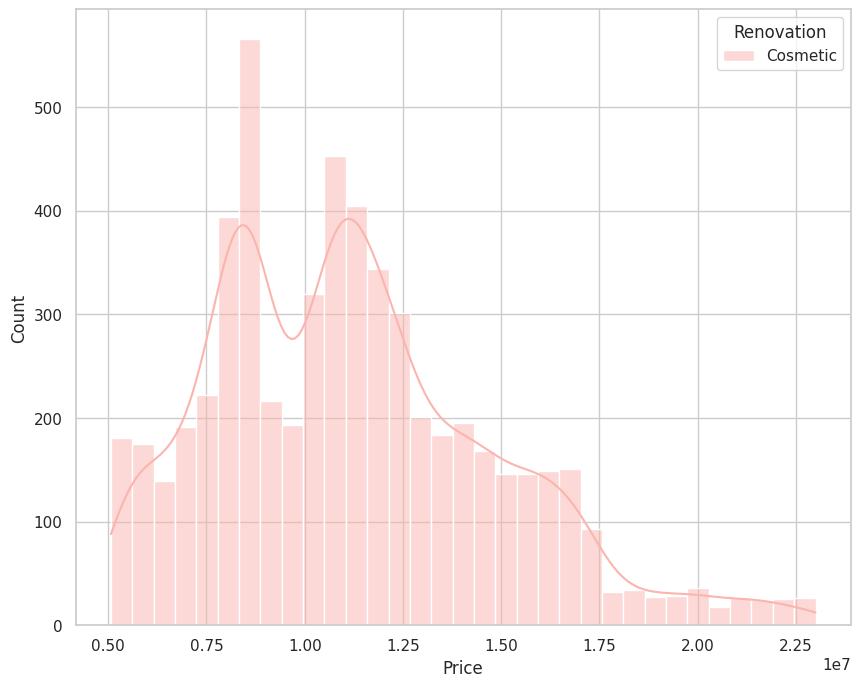

In [13]:
# plot pricing having removed outliers
sns.histplot(
    data=remove_outliers(df[df["Renovation"] == "Cosmetic"], "Price", quant=0.05),
    x="Price",
    hue="Renovation",
    kde=True,
)

<Axes: xlabel='Renovation', ylabel='Price'>

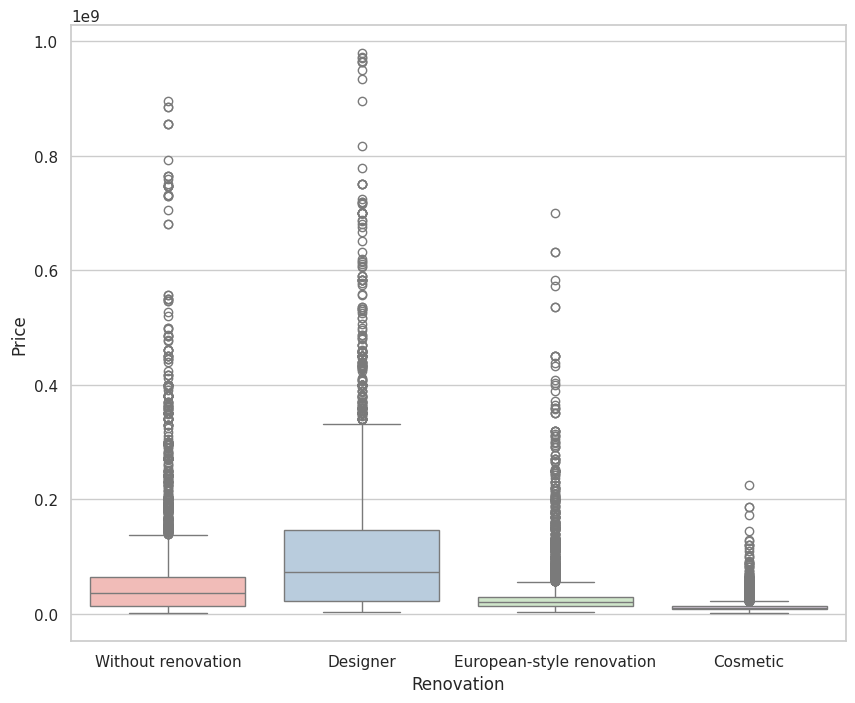

In [14]:
sns.boxplot(data=df, x="Renovation", y="Price", hue="Renovation", legend=False)

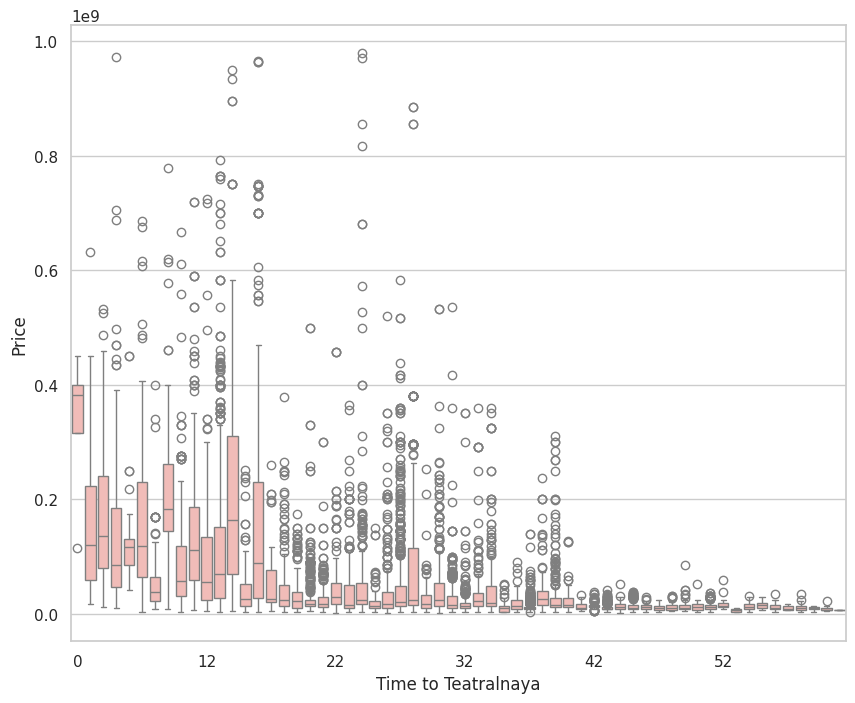

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.boxplot(
    x=(df["Time to Teatralnaya"]),
    y=df["Price"],
)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()

In [16]:
for district in df["District"].unique():
    print(
        district,
        df[df["District"] == district].corr().loc["Price", "Area"],
        df[df["District"] == district].shape,
    )
print("Total", df.corr().loc["Price", "Area"], df.shape)

Центральный 0.7727929121120529 (2893, 13)
Западный 0.7593114144998836 (1980, 13)
Северо-Восточный 0.9216364350561609 (910, 13)
Северный 0.8678299925014934 (1491, 13)
Новомосковский 0.9092185755288972 (697, 13)
Северо-Западный 0.9252382521430317 (694, 13)
Южный 0.8366065965976597 (1982, 13)
Восточный 0.8747489573101709 (653, 13)
Юго-Восточный 0.7570082661128272 (3933, 13)
Юго-Западный 0.8587878098555544 (850, 13)
Total 0.7919082564927317 (16083, 13)


/tmp/ipykernel_450832/1340464877.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df["District"] == district].corr().loc["Price", "Area"],
/tmp/ipykernel_450832/1340464877.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Total", df.corr().loc["Price", "Area"], df.shape)


<Axes: xlabel='Area', ylabel='Price'>

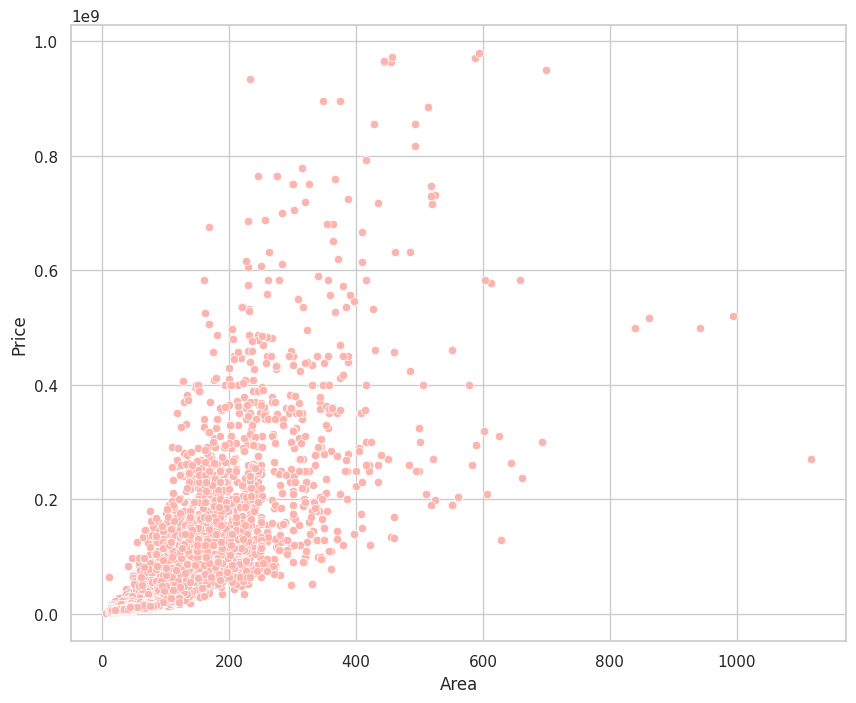

In [17]:
sns.scatterplot(data=df, x="Area", y="Price")

In [18]:
from scipy.stats import pearsonr

r, p = pearsonr(df["Area"], df["Price"])
print(r, p)

0.7919082564927291 0.0


In [19]:
from math import sqrt
from scipy.stats import linregress

x = df["Area"]
y = df["Price"]
x = x.to_numpy()
y = y.to_numpy()
linregr = linregress(x, y)
tvalue = (linregr.slope) / (linregr.stderr / sqrt(len(x)))
tvalue

20855.93276795176

<Axes: xlabel='Area', ylabel='Price'>

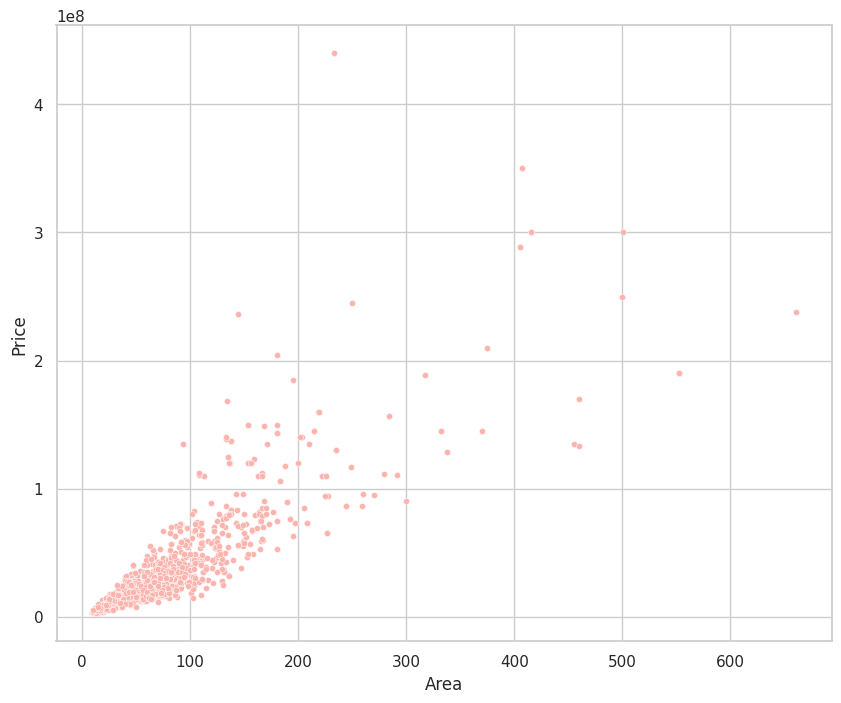

In [20]:
sns.scatterplot(data=df[df["District"] == "Северный"], x="Area", y="Price", s=20)

<Axes: xlabel='Price'>

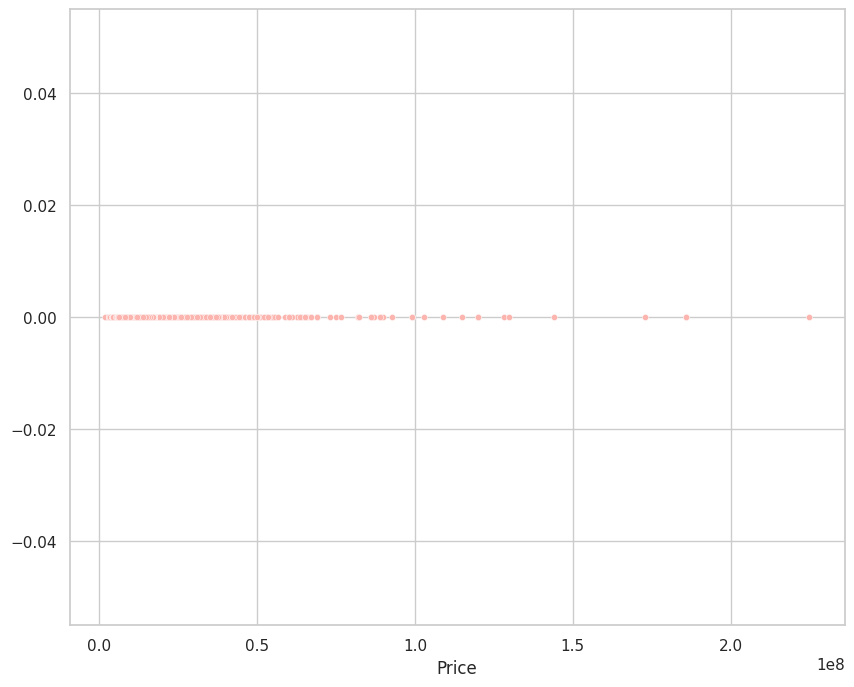

In [21]:
# check if "Renovation"=="Cosmetic" has outliers
sns.scatterplot(data=df[df["Renovation"] == "Cosmetic"], x="Price", y=0, s=20)

<Axes: xlabel='District', ylabel='Price'>

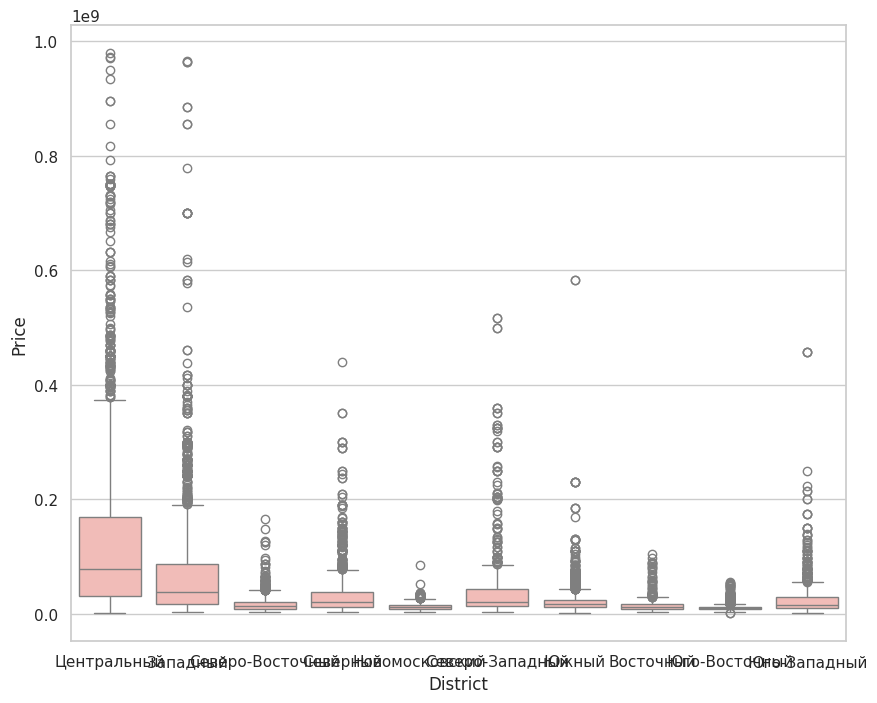

In [22]:
sns.boxplot(data=df, x="District", y="Price")

In [23]:
for district in df["District"].unique():
    print(
        district,
        df[df["District"] == district].corr().loc["Area", "Price"],
        df[df["District"] == district].shape,
    )

Центральный 0.7727929121120529 (2893, 13)
Западный 0.7593114144998836 (1980, 13)
Северо-Восточный 0.9216364350561609 (910, 13)
Северный 0.8678299925014934 (1491, 13)
Новомосковский 0.9092185755288972 (697, 13)
Северо-Западный 0.9252382521430317 (694, 13)
Южный 0.8366065965976597 (1982, 13)
Восточный 0.8747489573101709 (653, 13)
Юго-Восточный 0.7570082661128272 (3933, 13)
Юго-Западный 0.8587878098555544 (850, 13)


/tmp/ipykernel_450832/4129219703.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df["District"] == district].corr().loc["Area", "Price"],


In [24]:
df.groupby("District").median()

/tmp/ipykernel_450832/1136203411.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("District").median()


,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Time to Teatralnaya
District,,,,,,,,,
Восточный,12500000.0,13.0,2.0,42.90,24.0,8.5,4.0,12.0,27.0
Западный,37705000.0,11.5,3.0,86.00,46.6,14.0,8.0,17.0,29.0
Новомосковский,11200000.0,15.0,1.0,42.00,20.0,11.0,7.0,16.0,49.0
Северный,19970000.0,11.0,2.0,56.20,30.0,10.0,7.0,16.0,31.0
Северо-Восточный,13700000.0,12.0,1.0,44.15,25.0,8.7,6.0,14.0,30.0
Северо-Западный,20993400.0,12.0,2.0,62.40,33.5,11.8,8.0,19.0,27.0
Центральный,78000000.0,8.0,3.0,114.20,59.0,15.9,5.0,9.0,13.0
Юго-Восточный,9968220.0,14.0,1.0,44.82,24.4,11.2,9.0,11.0,43.0
Юго-Западный,16000000.0,12.0,2.0,54.00,30.7,10.0,7.0,16.0,32.0


<Axes: xlabel='Area', ylabel='Price'>

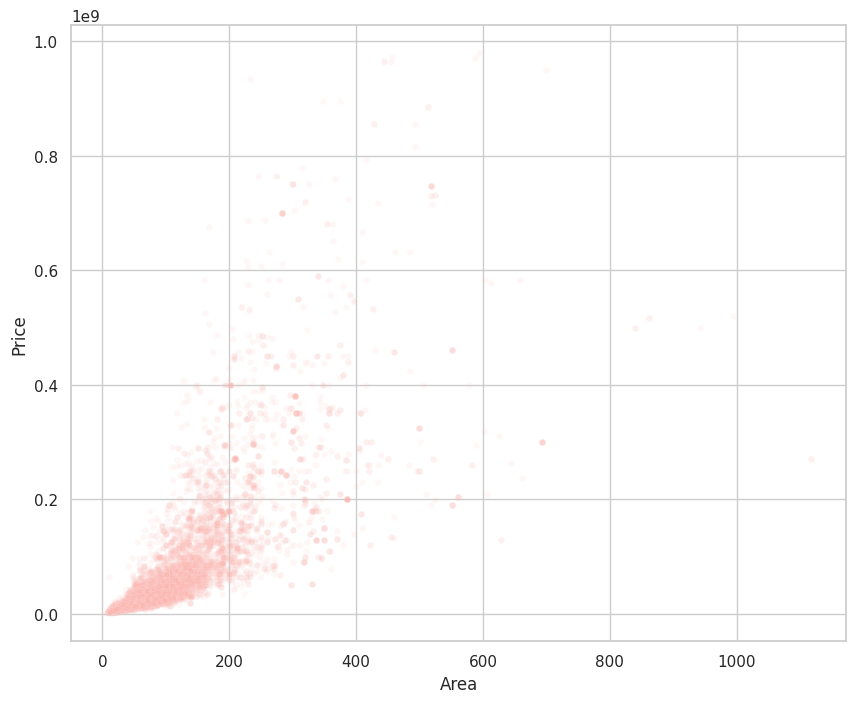

In [25]:
sns.scatterplot(
    data=df[df["Apartment type"] == "Secondary"], x="Area", y="Price", alpha=0.1, s=20
)

<Axes: xlabel='Area', ylabel='Price'>

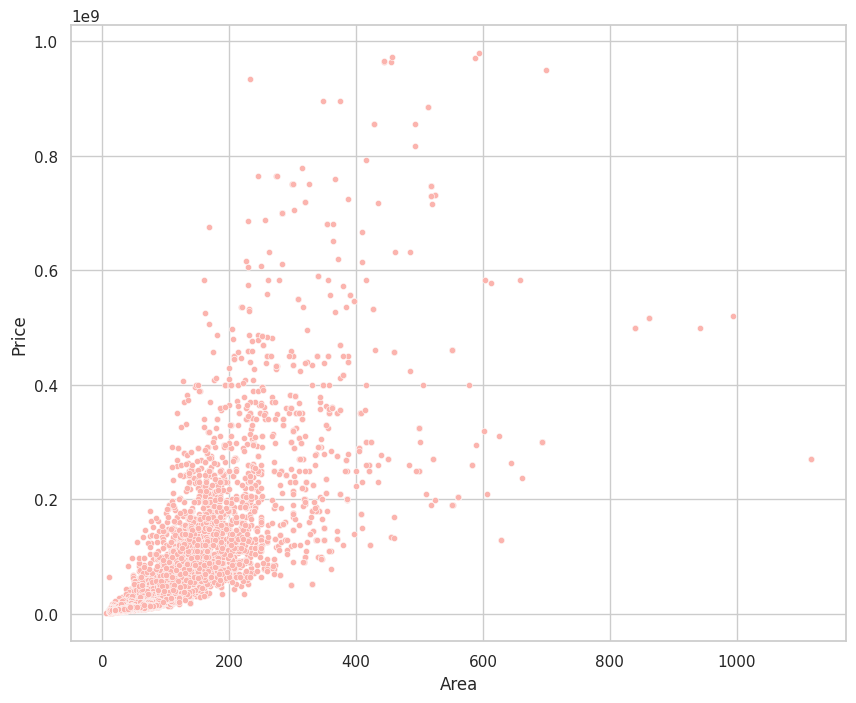

In [26]:
sns.scatterplot(data=df, x="Area", y="Price", s=20)

In [27]:
%pip install statsmodels

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [28]:
import statsmodels.api as sm

x = df["Area"]
x = sm.add_constant(x)
y = df["Price"]
model = sm.OLS(y, x)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 2.705e+04
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:49:24   Log-Likelihood:            -3.0884e+05
No. Observations:               16083   AIC:                         6.177e+05
Df Residuals:                   16081   BIC:                         6.177e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.622e+07   6.09e+05    -43.029      0.000   -2.74e+07    -2.5e+07
Area        8.965e+05   5451.624    164.455      0.000    8.86e+05    9.07e+05
==============================================================================
Omnibus:                    12860.055   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           981470.892
Skew:                           3.306   Prob(JB):                         0.00
Kurtosis:                      40.695   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x = df[["Time to Teatralnaya"]]
x = sm.add_constant(x)
y = df["Price"]
model = sm.OLS(y, x)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     3415.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:49:24   Log-Likelihood:            -3.1522e+05
No. Observations:               16083   AIC:                         6.304e+05
Df Residuals:                   16081   BIC:                         6.305e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.351e+08   1.63e+06     82.760      0.000    1.32e+08    1.38e+08
Time to Teatralnaya -2.955e+06   5.06e+04    -58.438      0.000   -3.05e+06   -2.86e+06
==============================================================================
Omnibus:                    14843.700   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           655975.263
Skew:                           4.447   Prob(JB):                         0.00
Kurtosis:                      32.997   Cond. No.                         85.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Number of rooms', ylabel='None'>

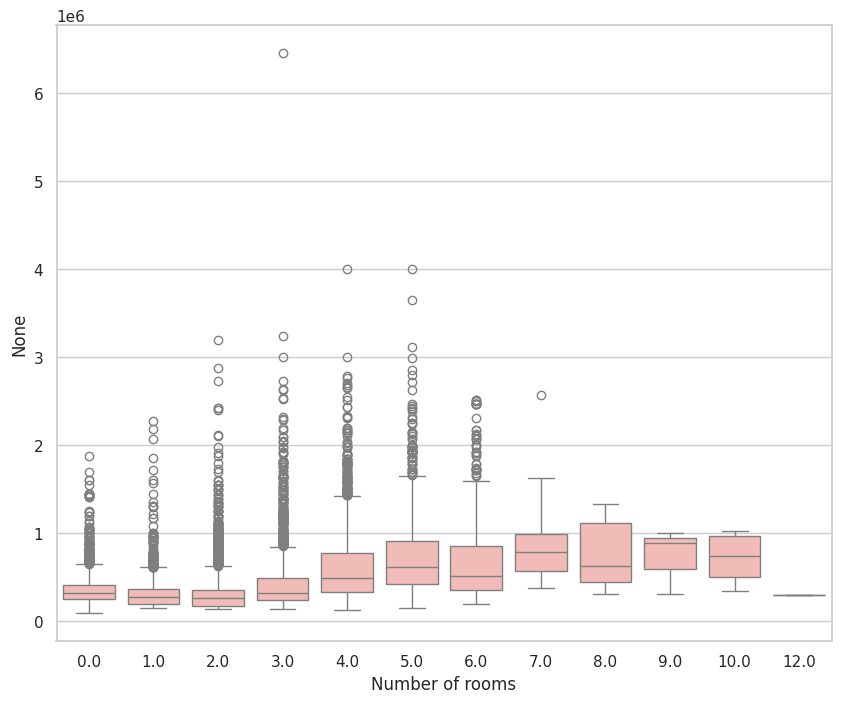

In [30]:
sns.boxplot(data=df, x="Number of rooms", y=df["Price"] / df["Area"])

/tmp/ipykernel_450832/3656167835.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


<Axes: >

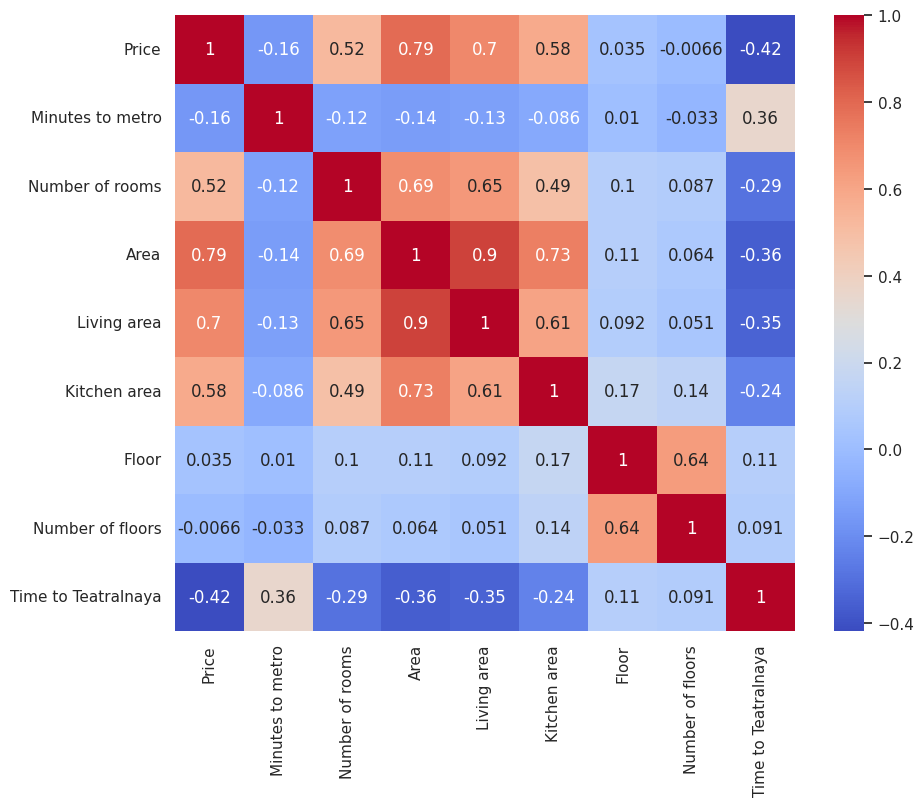

In [31]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [32]:
%pip install category_encoders scikit-learn

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [33]:
# RUN
df

,Price,Apartment type,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,Time to Teatralnaya,District
314,108800000.0,Secondary,Чеховская,5.0,3.0,108.8,57.1,15.6,3.0,3,Without renovation,7,Центральный
315,53000000.0,Secondary,Арбатская,9.0,3.0,96.9,59.0,11.1,2.0,5,Without renovation,11,Центральный
316,44240000.0,Secondary,Фили,6.0,3.0,63.2,34.1,11.9,40.0,41,Designer,29,Западный
317,105000000.0,Secondary,Белорусская,6.0,3.0,145.0,75.4,18.6,3.0,6,Designer,10,Центральный
318,47000000.0,Secondary,Белорусская,9.0,3.0,103.8,59.0,15.0,6.0,6,Without renovation,10,Центральный
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22642,14541800.0,New building,Аннино,7.0,2.0,79.9,42.5,13.3,6.0,22,Cosmetic,42,Южный
22643,14676600.0,New building,Аннино,7.0,2.0,80.2,42.7,13.3,8.0,22,Cosmetic,42,Южный
22644,13739550.0,New building,Аннино,7.0,2.0,75.7,40.4,12.9,5.0,22,Cosmetic,42,Южный
22645,8000000.0,New building,Царицыно,7.0,1.0,40.2,18.3,9.2,15.0,13,Cosmetic,29,Южный


In [34]:
X = df.drop(["Price", "Metro station", "Living area", "Kitchen area", "Floor", "Number of floors"], axis=1)
y = df["Price"]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
X_train

,Apartment type,Minutes to metro,Number of rooms,Area,Renovation,Time to Teatralnaya,District
7101,Secondary,11.0,2.0,54.00,Cosmetic,45,Юго-Западный
8921,Secondary,9.0,3.0,75.10,European-style renovation,36,Северный
6578,Secondary,13.0,2.0,61.00,Cosmetic,25,Восточный
6311,Secondary,5.0,2.0,72.90,European-style renovation,33,Северный
17136,New building,13.0,1.0,44.04,Cosmetic,37,Юго-Восточный
...,...,...,...,...,...,...,...
15443,New building,19.0,2.0,69.71,Cosmetic,43,Юго-Восточный
6063,Secondary,4.0,2.0,66.00,European-style renovation,28,Юго-Западный
1514,Secondary,25.0,0.0,17.30,European-style renovation,48,Северо-Западный
21590,New building,18.0,0.0,19.70,Cosmetic,37,Юго-Восточный


In [37]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=["Apartment type", "Renovation", "District"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train

,Apartment type_1,Apartment type_2,Minutes to metro,Number of rooms,Area,Renovation_1,Renovation_2,Renovation_3,Renovation_4,Time to Teatralnaya,District_1,District_2,District_3,District_4,District_5,District_6,District_7,District_8,District_9,District_10
7101,1,0,11.0,2.0,54.00,1,0,0,0,45,1,0,0,0,0,0,0,0,0,0
8921,1,0,9.0,3.0,75.10,0,1,0,0,36,0,1,0,0,0,0,0,0,0,0
6578,1,0,13.0,2.0,61.00,1,0,0,0,25,0,0,1,0,0,0,0,0,0,0
6311,1,0,5.0,2.0,72.90,0,1,0,0,33,0,1,0,0,0,0,0,0,0,0
17136,0,1,13.0,1.0,44.04,1,0,0,0,37,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15443,0,1,19.0,2.0,69.71,1,0,0,0,43,0,0,0,1,0,0,0,0,0,0
6063,1,0,4.0,2.0,66.00,0,1,0,0,28,1,0,0,0,0,0,0,0,0,0
1514,1,0,25.0,0.0,17.30,0,1,0,0,48,0,0,0,0,0,0,0,0,1,0
21590,0,1,18.0,0.0,19.70,1,0,0,0,37,0,0,0,1,0,0,0,0,0,0


In [38]:
from sklearn.preprocessing import RobustScaler

cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train

,Apartment type_1,Apartment type_2,Minutes to metro,Number of rooms,Area,Renovation_1,Renovation_2,Renovation_3,Renovation_4,Time to Teatralnaya,District_1,District_2,District_3,District_4,District_5,District_6,District_7,District_8,District_9,District_10
0,0.0,0.0,-0.1,0.0,-0.110497,1.0,0.0,0.0,0.0,0.789474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-0.3,0.5,0.278085,0.0,1.0,0.0,0.0,0.315789,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.1,0.0,0.018416,1.0,0.0,0.0,0.0,-0.263158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-0.7,0.0,0.237569,0.0,1.0,0.0,0.0,0.157895,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,1.0,0.1,-0.5,-0.293923,1.0,0.0,0.0,0.0,0.368421,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12861,-1.0,1.0,0.7,0.0,0.178821,1.0,0.0,0.0,0.0,0.684211,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12862,0.0,0.0,-0.8,0.0,0.110497,0.0,1.0,0.0,0.0,-0.105263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12863,0.0,0.0,1.3,-1.0,-0.786372,0.0,1.0,0.0,0.0,0.947368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12864,-1.0,1.0,0.6,-1.0,-0.742173,1.0,0.0,0.0,0.0,0.368421,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
%pip install catboost

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [40]:
%pip install ipywidgets ipython

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [41]:
from catboost import Pool

X_eval = X_test
y_eval = y_test

eval_dataset = Pool(data=X_eval, label=y_eval)

In [42]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(task_type="GPU", iterations=5500, devices="0:1")
model.fit(X_train, y_train, eval_set=eval_dataset)
y_pred = model.predict(X_test)
model.save_model("model.cbm")

Learning rate set to 0.050342
0:	learn: 85063829.4831865	test: 77691841.0774383	best: 77691841.0774383 (0)	total: 37.2ms	remaining: 3m 24s
1:	learn: 82329665.6293336	test: 75053426.3665846	best: 75053426.3665846 (1)	total: 48.2ms	remaining: 2m 12s
2:	learn: 79683659.9257246	test: 72377850.5910996	best: 72377850.5910996 (2)	total: 58.5ms	remaining: 1m 47s
3:	learn: 77224923.7948720	test: 69914600.5504573	best: 69914600.5504573 (3)	total: 69.9ms	remaining: 1m 36s
4:	learn: 74899133.9590555	test: 67652586.7235390	best: 67652586.7235390 (4)	total: 80.9ms	remaining: 1m 28s
5:	learn: 72738506.2354478	test: 65535198.8139376	best: 65535198.8139376 (5)	total: 91.3ms	remaining: 1m 23s
6:	learn: 70691315.3087437	test: 63431794.5963488	best: 63431794.5963488 (6)	total: 102ms	remaining: 1m 20s
7:	learn: 68865489.6662367	test: 61614437.0926896	best: 61614437.0926896 (7)	total: 113ms	remaining: 1m 17s
8:	learn: 67061337.9008244	test: 59987515.0111788	best: 59987515.0111788 (8)	total: 124ms	remaining:

In [43]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.21800400971668984

In [44]:
# from catboost import MetricVisualizer

# MetricVisualizer("catboost_info").start()

## Нейронка

In [45]:
%pip install keras tensorflow tensorflow[and-cuda]

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [397]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras

2024-03-22 14:03:06.572952: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-22 14:03:07.239856: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 14:03:07.240086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 14:03:07.295449: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 14:03:07.506500: I tensorflow/core/platform/cpu_feature_guar

In [398]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

2024-03-22 14:03:18.309272: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-22 14:03:18.588757: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-22 14:03:18.589071: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [399]:
X_train.shape

(12866, 20)

In [418]:
input_shape = X_train.shape[1:]

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1, activation="linear"),
    ]
)

In [412]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               2688      
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 128)              

In [419]:
model.compile(
    loss="mse",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["mae"],
)

In [420]:
batch_size = 32
epochs = 200

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model_checkpoints/model_at_epoch_{epoch}.keras", save_best_only=True
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=8),
]

model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.1,
)
score = model.evaluate(X_test, y_test)

Epoch 1/200


/home/kitlix/.pyenv/versions/3.11.2/lib/python3.11/site-packages/keras/src/engine/data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


362/362 [==============================] - 11s 12ms/step - loss: 4223581986750464.0000 - mae: 29959014.0000 - val_loss: 2839186251972608.0000 - val_mae: 23220366.0000
Epoch 2/200
362/362 [==============================] - 4s 10ms/step - loss: 2483652080435200.0000 - mae: 19568580.0000 - val_loss: 2462347432034304.0000 - val_mae: 18456656.0000
Epoch 3/200
362/362 [==============================] - 4s 11ms/step - loss: 2294814448025600.0000 - mae: 18128780.0000 - val_loss: 2424556820103168.0000 - val_mae: 18256478.0000
Epoch 4/200
362/362 [==============================] - 4s 10ms/step - loss: 2266561884717056.0000 - mae: 17447470.0000 - val_loss: 2965670622920704.0000 - val_mae: 17420998.0000
Epoch 5/200
362/362 [==============================] - 4s 11ms/step - loss: 2274525827825664.0000 - mae: 17276718.0000 - val_loss: 2347293579673600.0000 - val_mae: 15833316.0000
Epoch 6/200
362/362 [==============================] - 4s 10ms/step - loss: 2170713247055872.0000 - mae: 16593041.0000 - 

In [421]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred = model.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

101/101 [==============================] - 1s 4ms/step


0.24246987771188602

In [417]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
y_pred = linreg_model.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.9213315696906689

In [422]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.15241594438917905

In [427]:
keras.backend.clear_session()

In [46]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 1.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 4.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 4.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.7/757.7 kB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.0/620.0 kB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 1.5 MB/s eta 0:00:00a 0:00:01
DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: typing-extensions
    Found existing installation: t

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import optuna

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 300)
    max_depth = trial.suggest_int("max_depth", 10, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"])
    criterion = trial.suggest_categorical("criterion", ["squared_error", "absolute_error", "friedman_mse", "poisson"])
    
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        criterion=criterion
    )
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    return score

study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=200)
best_trial = study.best_trial
best_trial.value

[I 2024-03-22 15:33:02,444] A new study created in memory with name: no-name-be317a98-0397-44de-9b2f-1b008fd76edb
[W 2024-03-22 15:35:48,835] Trial 0 failed with parameters: {'n_estimators': 175, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'criterion': 'absolute_error'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/kitlix/.pyenv/versions/3.11.2/lib/python3.11/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_450832/3192072704.py", line 21, in objective
    rf_model.fit(X_train, y_train)
  File "/home/kitlix/.local/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kitlix/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 489, in fi

KeyboardInterrupt: 

In [53]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.2035604178748991